<a href="https://colab.research.google.com/github/nachodelis/AA_PRACTICA1_GRUPO_4/blob/main/AA_PRACTICA2_GRUPO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Grupo 4

Luis Ignacio de Lis Guijarro

Carlos Ocón Garay


**REDES CONVULACIONALES**

Utilizaremos la biblioteca Python Keras para reconocer y clasificar imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.

In [1]:
#importamos keras
%tensorflow_version 2.x
import keras
import tensorflow as tf
from keras import models
from keras import layers

print(tf.__version__)#

2.7.0


In [2]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
from keras.utils.np_utils import to_categorical

In [3]:
#importamos lass imagenes y las separamos en train y test
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names=["Camiseta","Pantalon","Jersey","Vestido","Cazadora","Sandalia","Camisa","Zapatillas","Bolso","Bota"]
class_names=np.array(class_names)

In [4]:
print(train_images.shape)
print(train_images[1])
print(train_labels[1])
print(class_names.shape)

(60000, 28, 28)
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  4

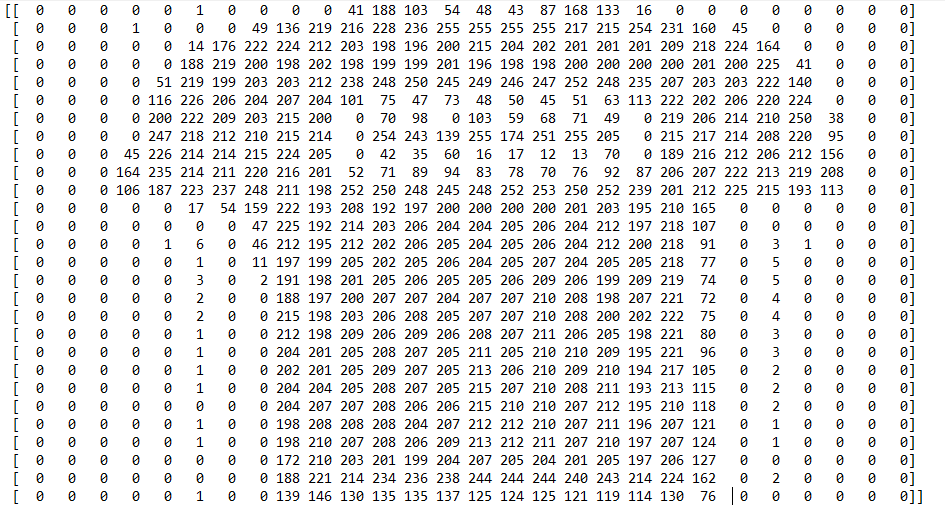

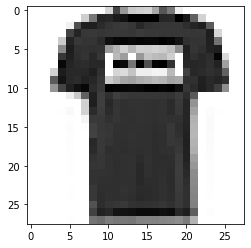

In [5]:
imagen = train_images[1]
plt.imshow(imagen, cmap=plt.cm.binary)
plt.show()

##La ropa viene asignada con las siguientes etiquetas:

0.   Camiseta
1.   Pantalón
2.   Jersey
3.   Vestido
4.   Cazadora
5.   Sandalia
6.   Camisa
7.   Zapatillas
8.   Bolso
9.   Bota

#PROCESAMIENTO DE LOS DATOS


In [6]:
print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255



print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000,)


#PRIMERA RED


In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1),name='Capa1'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu',name='Capa2'))
model.add(MaxPooling2D((2, 2)))
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa1 (Conv2D)              (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 Capa2 (Conv2D)              (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [8]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
600/600 [==============================] - 6s 7ms/step - loss: 1.2170 - accuracy: 0.5808
Epoch 2/5
600/600 [==============================] - 4s 7ms/step - loss: 0.6786 - accuracy: 0.7497
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5901 - accuracy: 0.7839
Epoch 4/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5391 - accuracy: 0.8041
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.5193 - accuracy: 0.8061
Test accuracy: 0.8061000108718872


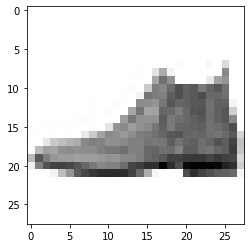

In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(predtrain_images, predtrain_labels), (predtest_images, predtest_labels) = fashion_mnist.load_data()
imagen6 = predtest_images[0]
predtrain_images = predtrain_images.reshape((60000, 28 , 28,1))
predtest_images = predtest_images.reshape((10000, 28 , 28,1))

predtrain_images = predtrain_images.astype('float32') / 255
predtest_images = predtest_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical


predtest_labels = to_categorical(predtest_labels)


predictions = model.predict(predtest_images)

np.sum(predictions[0])

plt.imshow(imagen6, cmap=plt.cm.binary)
plt.show()

predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
 

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

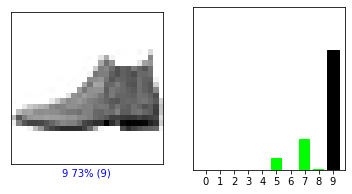

In [10]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)

plot_value_array(i, predictions[i], test_labels)
plt.show()

In [11]:
def plot_image(i,predictions_array, true_label,img):
  predictions_array, true_label, img = predictions_array, true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)


  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)
  
             


In [12]:
def plot_value_array(i, predictions_array,true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array, color="red")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array,)
  thisplot[predicted_label].set_color('green')

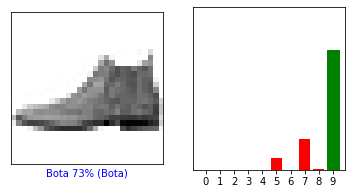

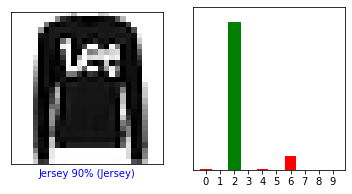

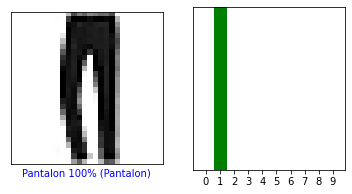

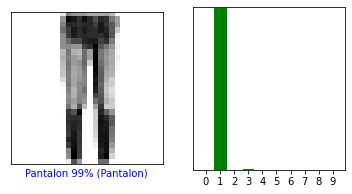

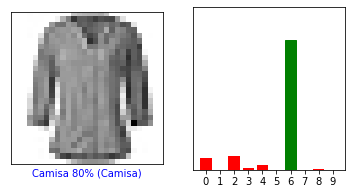

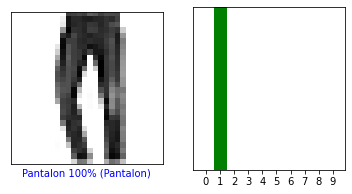

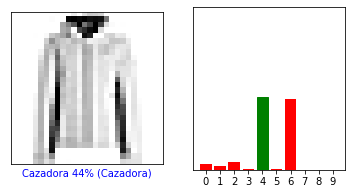

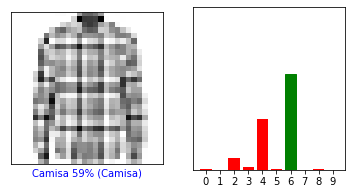

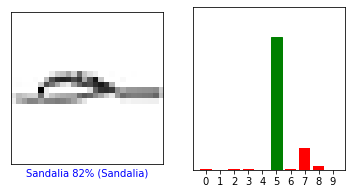

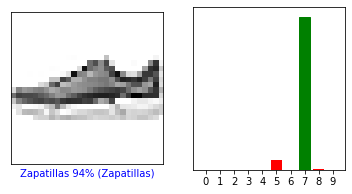

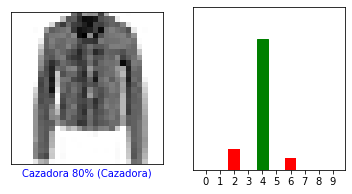

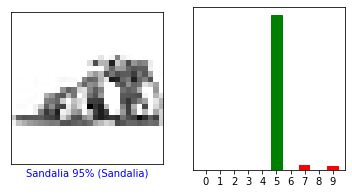

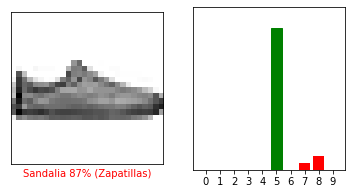

In [13]:
for i in range (0,13):
 plt.figure(figsize=(6,3))
 plt.subplot(1,2,1)
 plot_image(i,predictions[i],test_labels,test_images.reshape(10000,28,28))
 plt.subplot(1,2,2)
 plot_value_array(i,predictions[i], test_labels)
 plt.show

#SEGUNDA RED

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
model = Sequential()
model.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1),padding="same",name='Capa1'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu',padding="same",name='Capa2'))
model.add(MaxPooling2D((2, 2)))

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model.add(Flatten())
model.add(Dense(65, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa1 (Conv2D)              (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 Capa2 (Conv2D)              (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 65)               

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
600/600 [==============================] - 7s 11ms/step - loss: 1.0835 - accuracy: 0.6297
Epoch 2/5
600/600 [==============================] - 7s 11ms/step - loss: 0.6315 - accuracy: 0.7685
Epoch 3/5
600/600 [==============================] - 7s 11ms/step - loss: 0.5540 - accuracy: 0.7977
Epoch 4/5
600/600 [==============================] - 7s 11ms/step - loss: 0.5026 - accuracy: 0.8180
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.4833 - accuracy: 0.8268
Test accuracy: 0.8267999887466431


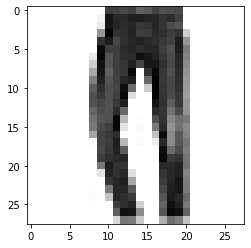

In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(predtrain_images, predtrain_labels), (predtest_images, predtest_labels) = fashion_mnist.load_data()
imagen6 = predtest_images[5]
predtrain_images = predtrain_images.reshape((60000, 28 , 28,1))
predtest_images = predtest_images.reshape((10000, 28 , 28,1))

predtrain_images = predtrain_images.astype('float32') / 255
predtest_images = predtest_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical


predtest_labels = to_categorical(predtest_labels)


predictions = model.predict(predtest_images)

np.sum(predictions[5])

plt.imshow(imagen6, cmap=plt.cm.binary)
plt.show()

predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
 

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

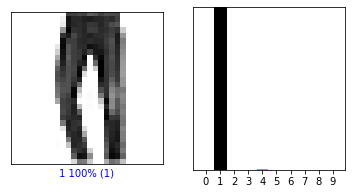

In [17]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)

plot_value_array(i, predictions[i], test_labels)
plt.show()

In [18]:
def plot_image(i,predictions_array, true_label,img):
  predictions_array, true_label, img = predictions_array, true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)


  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)
  
             


In [19]:
def plot_value_array(i, predictions_array,true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array, color="red")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array,)
  thisplot[predicted_label].set_color('green')

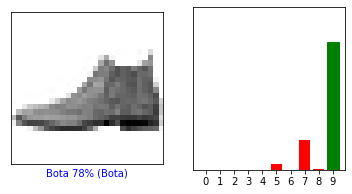

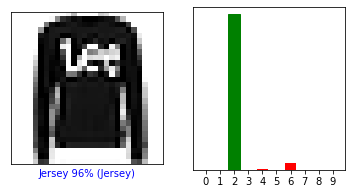

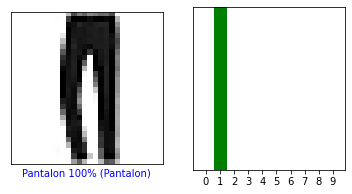

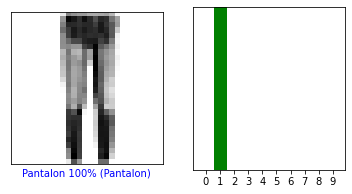

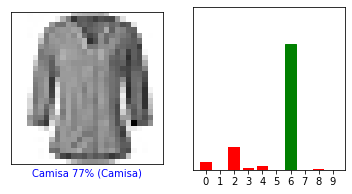

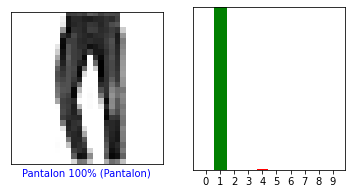

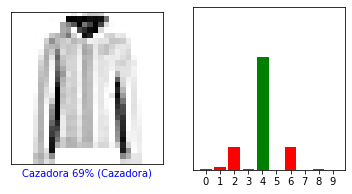

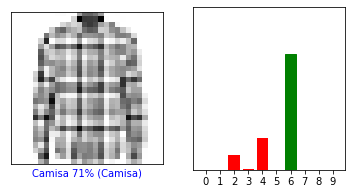

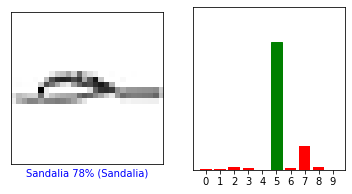

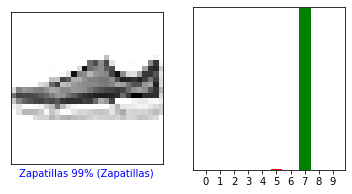

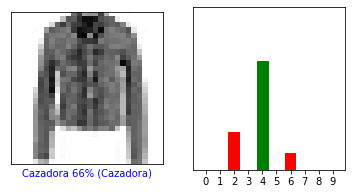

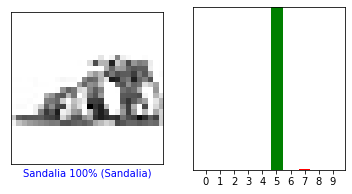

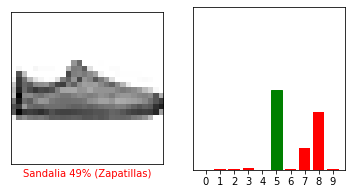

In [20]:
for i in range (0,13):
 plt.figure(figsize=(6,3))
 plt.subplot(1,2,1)
 plot_image(i,predictions[i],test_labels,test_images.reshape(10000,28,28))
 plt.subplot(1,2,2)
 plot_value_array(i,predictions[i], test_labels)
 plt.show

#TERCERA RED


In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
model = Sequential()
model.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1),padding="same",name='Capa1'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu',padding="same",name='Capa2'))
model.add(MaxPooling2D((2, 2)))

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model.add(Flatten())
model.add(Dense(65, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa1 (Conv2D)              (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 Capa2 (Conv2D)              (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 65)               

In [22]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
600/600 [==============================] - 8s 12ms/step - loss: 0.4601 - accuracy: 0.8344
Epoch 2/5
600/600 [==============================] - 7s 12ms/step - loss: 0.2934 - accuracy: 0.8937
Epoch 3/5
600/600 [==============================] - 7s 12ms/step - loss: 0.2529 - accuracy: 0.9079
Epoch 4/5
600/600 [==============================] - 7s 12ms/step - loss: 0.2249 - accuracy: 0.9181
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.2602 - accuracy: 0.9115
Test accuracy: 0.9114999771118164


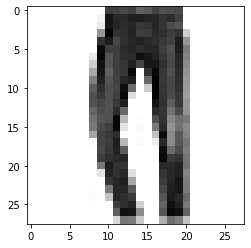

In [23]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(predtrain_images, predtrain_labels), (predtest_images, predtest_labels) = fashion_mnist.load_data()
imagen6 = predtest_images[5]
predtrain_images = predtrain_images.reshape((60000, 28 , 28,1))
predtest_images = predtest_images.reshape((10000, 28 , 28,1))

predtrain_images = predtrain_images.astype('float32') / 255
predtest_images = predtest_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical


predtest_labels = to_categorical(predtest_labels)


predictions = model.predict(predtest_images)

np.sum(predictions[5])

plt.imshow(imagen6, cmap=plt.cm.binary)
plt.show()

predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
 

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

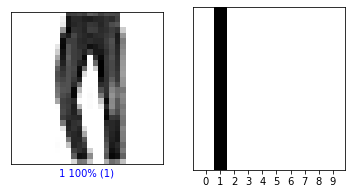

In [24]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)

plot_value_array(i, predictions[i], test_labels)
plt.show()

In [25]:
def plot_image(i,predictions_array, true_label,img):
  predictions_array, true_label, img = predictions_array, true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)


  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)
  
             


In [26]:
def plot_value_array(i, predictions_array,true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array, color="red")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array,)
  thisplot[predicted_label].set_color('green')

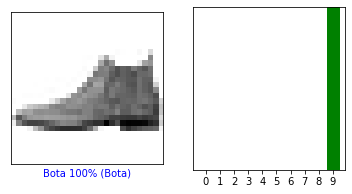

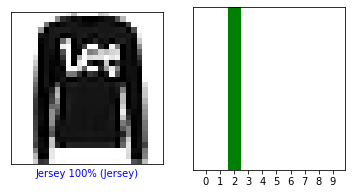

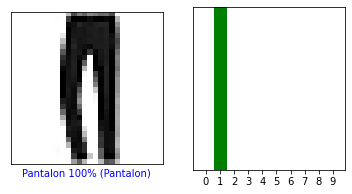

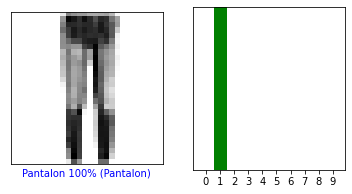

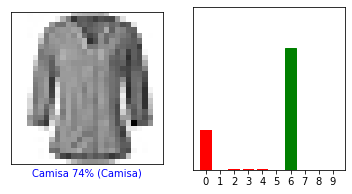

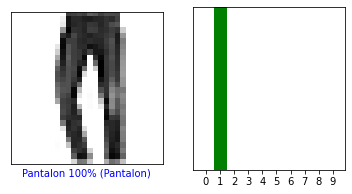

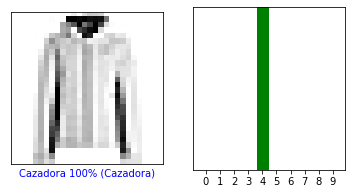

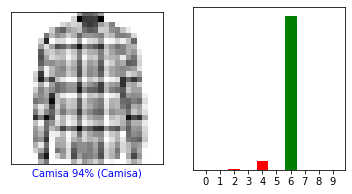

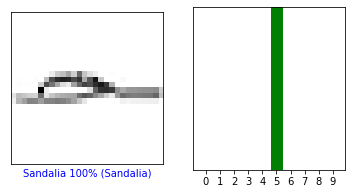

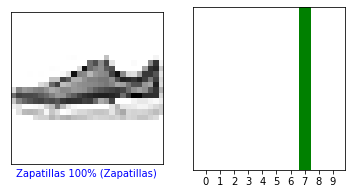

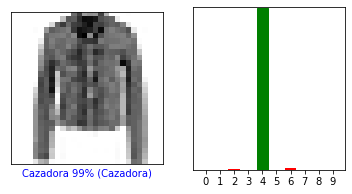

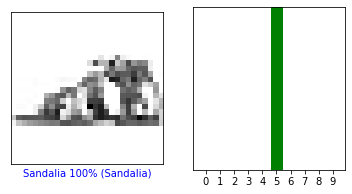

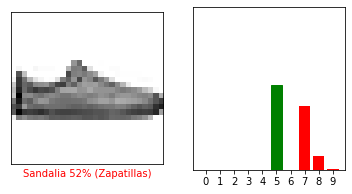

In [27]:
for i in range (0,13):
 plt.figure(figsize=(6,3))
 plt.subplot(1,2,1)
 plot_image(i,predictions[i],test_labels,test_images.reshape(10000,28,28))
 plt.subplot(1,2,2)
 plot_value_array(i,predictions[i], test_labels)
 plt.show

#CASO 1 25 EPOCAS

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1),name='Capa1'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu',name='Capa2'))
model.add(MaxPooling2D((2, 2)))
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa1 (Conv2D)              (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 Capa2 (Conv2D)              (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [29]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=100,
          epochs=25,
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/25
600/600 [==============================] - 5s 8ms/step - loss: 1.2391 - accuracy: 0.5904
Epoch 2/25
600/600 [==============================] - 4s 7ms/step - loss: 0.6680 - accuracy: 0.7566
Epoch 3/25
600/600 [==============================] - 4s 7ms/step - loss: 0.5851 - accuracy: 0.7877
Epoch 4/25
600/600 [==============================] - 4s 7ms/step - loss: 0.5361 - accuracy: 0.8079
Epoch 5/25
600/600 [==============================] - 4s 7ms/step - loss: 0.5027 - accuracy: 0.8196
Epoch 6/25
600/600 [==============================] - 4s 7ms/step - loss: 0.4778 - accuracy: 0.8305
Epoch 7/25
600/600 [==============================] - 4s 7ms/step - loss: 0.4575 - accuracy: 0.8378
Epoch 8/25
600/600 [==============================] - 4s 7ms/step - loss: 0.4398 - accuracy: 0.8442
Epoch 9/25
600/600 [==============================] - 4s 6ms/step - loss: 0.4267 - accuracy: 0.8493
Epoch 10/25
600/600 [==============================] - 4s 7ms/step - loss: 0.4161 - accuracy: 0.8530

#CASO 1 TANH

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1),name='Capa1'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='tanh',name='Capa2'))
model.add(MaxPooling2D((2, 2)))
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa1 (Conv2D)              (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 Capa2 (Conv2D)              (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [31]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
600/600 [==============================] - 4s 7ms/step - loss: 1.1043 - accuracy: 0.6517
Epoch 2/5
600/600 [==============================] - 4s 6ms/step - loss: 0.6543 - accuracy: 0.7613
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5766 - accuracy: 0.7907
Epoch 4/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5306 - accuracy: 0.8099
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.5062 - accuracy: 0.8192
Test accuracy: 0.8191999793052673
